### En este Script se implementan cuatro maneras de calcular la descomposicion de QR
 Donde Q es ortogonal y R es triangular superior. Se comparan las entradas diagonales
 de R con los valores propios de una matriz M = UDV^* con U y V ortogonales aleatorias
 y donde M tiene valores singulares que decrecen exponencialmente.

### Los metodos que usamos son:
#### 1. Transformaciones de Householder
#### 2. Transformaciones de Householder con signo fijo
#### 3. Gram-Schmidt clasico
#### 4. Gram-Schmidt modificado

In [1]:
function reflector(V)
  I = eye(length(V))
  W = V/norm(V)
  return I - 2* W * W'
end

reflector (generic function with 1 method)

In [2]:
V= [1,2,3]
R= reflector(V)

3x3 Array{Float64,2}:
  0.857143  -0.285714  -0.428571
 -0.285714   0.428571  -0.857143
 -0.428571  -0.857143  -0.285714

In [3]:
#Tests de la funcion
println(R*V+V)
det(R)
println(eigvals(R))
R'* R

[-2.220446049250313e-16,-4.440892098500626e-16,-8.881784197001252e-16]
[-1.0000000000000004,0.9999999999999998,0.9999999999999999]


3x3 Array{Float64,2}:
 1.0          5.55112e-17  8.32667e-17
 5.55112e-17  1.0          1.66533e-16
 8.32667e-17  1.66533e-16  1.0        

In [4]:
#Un Paso de Householder
function houseHold(Z)
    X=Z[:,1]
    I = eye(length(X))
    W= -sign(X[1])*norm(X)*I[:,1]-X
    W = W/norm(W)
    ref = reflector(W)
    return ref *Z
end

houseHold (generic function with 1 method)

In [5]:
function houseHoldMala(Z)
    X=Z[:,1]
    I = eye(length(X))
    W= -norm(X)*I[:,1]-X
    W = W/norm(W)
    ref = reflector(W)
    return ref * Z
end

houseHoldMala (generic function with 1 method)

In [6]:
function fullHousehold(Z)
  ncols = size(Z)[2]
  Result = copy(Z)
  for k in 1:ncols
      tmp = Result[k:end, k:end]
      tmp = houseHold(tmp)
      Result[k:end,k:end] = tmp
  end
  return Result
end

fullHousehold (generic function with 1 method)

In [7]:
function fullHouseholdMala(Z)
  ncols = size(Z)[2]
  Result = copy(Z)
  for k in 1:ncols
      tmp = Result[k:end, k:end]
      tmp = houseHoldMala(tmp)
      Result[k:end,k:end] = tmp
  end
  return Result
end

fullHouseholdMala (generic function with 1 method)

In [8]:
#Implementacion de Gram-schidt de Federico y Veronica
function gs(D) #C es una matriz cuyas columnas forman una base de R^n
    C = copy(D)
    n = size(C)[1]
    #vectorq =  zeros(n,n)
    #vectora = zeros(n,n)
    for j in 1:n #j es la columna
        #vectora[:,j] = copy(C[:, j])
        if (j !=1)
            C[:,j] = C[:,j]/norm(C[:,j])

            for i in 1: (j-1)
                rij = (C[:,i]'*C[:,j])[1]
                C[:,j] = C[:,j] - rij*C[:,i]
            end

        else
            #vectorq[:,1] = vectora[:,1]/norm(C[:,1])
            C[:,1] = C[:, 1]/norm(C[:,1])
        end
    end
    return(C)
end


gs (generic function with 1 method)

In [9]:
#asumo que tengo una lista C de vectores que son base
#C= diagm([12,2.0,3.0]) #reshape([1,2,3, 9,5,4, 3,4,6], 3,3) #para probar. Cada fila es un vector
#n = size(C)[1]
function gsm(D)
    C = copy(D)
    n = size(C)[1]#nro filas de C
    for i in 1:n #i es la fila
      rii = norm(C[:,i])
      C[:,i] = C[:,i]/rii
       if i !=n
              for j in (i+1):n
              rij = C[:,i]'*C[:,j]
              C[:,j] = C[:,j] - rij[1]*C[:,i]

              end
          end
      end
    return(C)
end


gsm (generic function with 1 method)

In [10]:
#Construimos una matriz aleatoria M cuyos valores singulares decrecen exponencialmente
n=80
A=randn(n,n)
Q,R = qr(A)
A=randn(n,n)
Q2,R2 = qr(A)
V = Array{Float64}([exp(-i) for i in collect(1:n)])
D = diagm(V)
#M = Array{BigFloat}(Q*D*Q2) #Cambiando el tipo a BigFloat se puede hacer que el Gram-Schmidt modificado sea tan bueno como Householder
M = Array{Float64}(Q*D*Q2) 

80x80 Array{Float64,2}:
 -0.000267192   0.000250526  -0.00341381  …  -0.000544206   0.00279939 
 -0.000676816   0.000217341   0.00395793     -4.78758e-5    0.000976475
 -0.00801902    0.00234459    0.014008        0.00333241    0.0017891  
  0.00397157   -0.000425933  -0.00470819      0.000345192  -0.00377814 
 -0.00166054    0.000491335  -0.00225906     -0.000729347   0.00405195 
  0.000920872  -4.52521e-5   -0.00227933  …  -0.000150989   0.000216093
  0.00750246   -0.00181288   -0.00982405     -0.0018591    -0.00404627 
  0.00420931   -0.00114538   -0.00633284     -0.00115231   -0.00280028 
 -0.00634449    0.00167896    0.00954588      0.0020898     0.00233448 
  0.00223511   -0.000270311  -0.0124997      -0.00205863    0.00423678 
 -0.00709456    0.0016363     0.00802668  …   0.000834685   0.00596428 
  0.00769243   -0.00145858   -0.0177608      -0.00217454   -0.00151087 
 -0.000347014   0.000371233  -0.00636529     -0.00107472    0.0045156  
  ⋮                                     

In [11]:
#Ahora calculamos la descomposicion QR de M de muchas maneras
#1. Transformaciones de Householder sin signo
R = fullHouseholdMala(M)
W = abs(diag(R))
#2. Transformaciones de Householder con signo
RB = fullHousehold(M)
WB = abs(diag(RB))
#3. Gram schmidt usual
RC = abs(diag(gs(M)'*M))
#4. Gram schmidt modificado
RD = abs(diag(gsm(M)'*M))


80-element Array{Float64,1}:
 0.0419437  
 0.00283608 
 0.0349051  
 0.00150363 
 0.00711293 
 0.00026951 
 0.000854969
 7.55211e-5 
 6.75293e-5 
 5.84055e-6 
 1.69345e-5 
 9.55626e-7 
 2.19758e-6 
 ⋮          
 0.00084437 
 0.00718444 
 0.00049273 
 0.0037231  
 0.00468191 
 0.000208002
 0.000791117
 0.00266393 
 0.00341057 
 0.00236857 
 0.00101869 
 0.00235567 

In [12]:
using PyPlot

In [13]:
k=1 #Queremos ver los valores propios solo a partir del k-esimo
B= [i for i in collect(1:n)]
B2 = B[k:end]
W2 = log(W[k:end])
W2B = log(WB[k:end])
R2C = log(RC[k:end])
R2D = log(RD[k:end])


80-element Array{Float64,1}:
  -3.17143
  -5.86533
  -3.35512
  -6.49987
  -4.94584
  -8.2189 
  -7.06444
  -9.4911 
  -9.60295
 -12.0507 
 -10.9862 
 -13.8609 
 -13.0282 
   ⋮      
  -7.07692
  -4.93584
  -7.61555
  -5.5932 
  -5.36405
  -8.47796
  -7.14206
  -5.92795
  -5.68088
  -6.04547
  -6.88924
  -6.05093

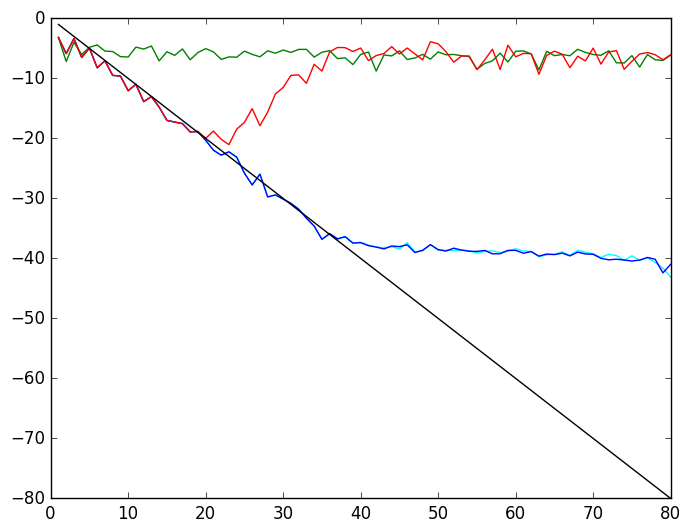

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7efa791af350>

In [19]:
plot(B2,W2, "cyan") #Householder
plot(B2,W2B, "blue") #Householder sin ajustar signos
plot(B2,R2C, "green") #Gram-Schmidt
plot(B2,R2D, "red") # Gram-Schmidt modificada
plot(B2, [-j for j in k:n], "black") #Recta alrededor de la que deberian
#estar los valores propios


La grafica indica que en Inestabilidad numerica los metodos son 1=2 < 4 < 3 (ver primer parrafo para explicacion de la numeracion utilizada).